In [136]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy import interpolate
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline

In [137]:
iris=load_iris()
iris_d = iris.data[:, :2] # we only take the first two features.
irisDF=pd.DataFrame(iris_d)
ss = StandardScaler()
data_df = ss.fit_transform(irisDF)

In [163]:
X = data_df
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

120
30
120
30


In [160]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 100):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    
    Y_test_pred= knn.predict(X_test)
    te_score = accuracy_score(Y_test_pred,Y_test)
    test_score.append(te_score)

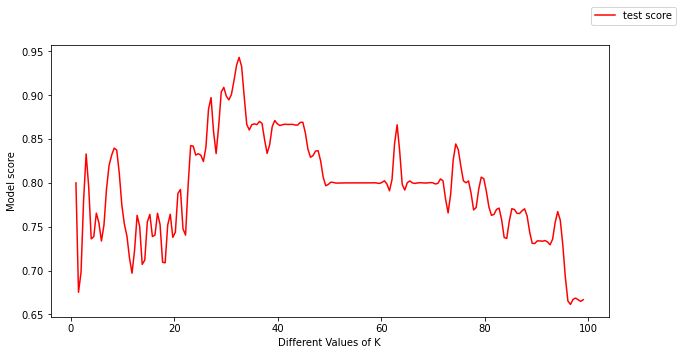

In [161]:
k_vals=np.array(k_vals)
sp = np.linspace(k_vals.min(), k_vals.max(), 200)
b_BSpline = interpolate.make_interp_spline(k_vals, test_score)
te_score_new = b_BSpline(sp)

plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(sp, te_score_new, color = 'r', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

Error(Model) = Variance(Model) + Bias(Model) + Variance(Irreducible Error)


https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/

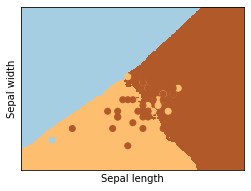

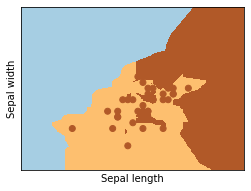

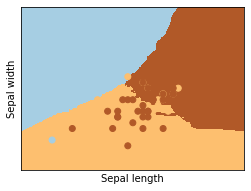

In [189]:
h = .02 # step size in the mesh
k = [32, 2, 100]
for i in range(len(k)):
    knn=neighbors.KNeighborsClassifier(n_neighbors = k[i])

    # we create an instance of Neighbours Classifier and fit the data.
    knn.fit(X, Y)

    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure(1, figsize=(4, 3))
    pl.set_cmap(pl.cm.Paired)
    pl.pcolormesh(xx, yy, Z)

    # Plot also the training points
    pl.scatter(X[:,0], X[:,1],c=Y )
    pl.xlabel('Sepal length')
    pl.ylabel('Sepal width')

    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xticks(())
    pl.yticks(())

    pl.show()

https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/auto_examples/tutorial/plot_knn_iris.html

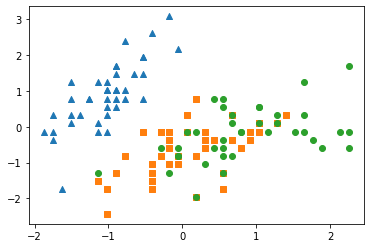

In [190]:
columns=['sepal_length','sepal_width']
irisDF2=pd.DataFrame(X_train, columns=columns)
irisDF2['target'] = Y_train

markers=['^','s', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF2[irisDF2['target']==i]['sepal_length']
    y_axis_data = irisDF2[irisDF2['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
